In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
df = pd.read_csv('air_quality.csv')

In [3]:
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(9471, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [6]:
df=df.iloc[0:9357]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [8]:
df['CO(GT)'].unique()

array([ 2.60e+00,  2.00e+00,  2.20e+00,  1.60e+00,  1.20e+00,  1.00e+00,
        9.00e-01,  6.00e-01, -2.00e+02,  7.00e-01,  1.10e+00,  1.70e+00,
        1.50e+00,  1.90e+00,  2.90e+00,  4.80e+00,  6.90e+00,  6.10e+00,
        3.90e+00,  1.40e+00,  8.00e-01,  4.40e+00,  3.10e+00,  2.70e+00,
        2.10e+00,  2.50e+00,  2.80e+00,  2.40e+00,  3.70e+00,  6.60e+00,
        3.50e+00,  5.40e+00,  3.20e+00,  4.10e+00,  3.60e+00,  2.30e+00,
        4.20e+00,  1.80e+00,  3.00e+00,  4.60e+00,  5.90e+00,  3.40e+00,
        5.50e+00,  8.10e+00,  5.80e+00,  8.00e+00,  6.50e+00,  1.30e+00,
        5.30e+00,  3.30e+00,  4.00e+00,  3.80e+00,  5.10e+00,  5.00e-01,
        4.30e+00,  5.00e+00,  7.60e+00,  6.70e+00,  5.70e+00,  4.70e+00,
        4.50e+00,  6.20e+00,  4.00e-01,  3.00e-01,  5.20e+00,  4.90e+00,
        6.30e+00,  7.30e+00,  6.40e+00,  6.00e+00,  5.60e+00,  7.20e+00,
        2.00e-01,  1.00e-01,  7.50e+00,  7.00e+00,  7.70e+00,  6.80e+00,
        8.40e+00,  7.90e+00,  9.50e+00,  9.20e+00, 

In [9]:
df.replace(-200,np.nan, inplace=True)
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         7674 non-null   float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   NMHC(GT)       914 non-null    float64
 5   C6H6(GT)       8991 non-null   float64
 6   PT08.S2(NMHC)  8991 non-null   float64
 7   NOx(GT)        7718 non-null   float64
 8   PT08.S3(NOx)   8991 non-null   float64
 9   NO2(GT)        7715 non-null   float64
 10  PT08.S4(NO2)   8991 non-null   float64
 11  PT08.S5(O3)    8991 non-null   float64
 12  T              8991 non-null   float64
 13  RH             8991 non-null   float64
 14  AH             8991 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [11]:
df.drop(['Unnamed: 15','Unnamed: 16'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         7674 non-null   float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   NMHC(GT)       914 non-null    float64
 5   C6H6(GT)       8991 non-null   float64
 6   PT08.S2(NMHC)  8991 non-null   float64
 7   NOx(GT)        7718 non-null   float64
 8   PT08.S3(NOx)   8991 non-null   float64
 9   NO2(GT)        7715 non-null   float64
 10  PT08.S4(NO2)   8991 non-null   float64
 11  PT08.S5(O3)    8991 non-null   float64
 12  T              8991 non-null   float64
 13  RH             8991 non-null   float64
 14  AH             8991 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [12]:
df['CO(GT)'].unique()

array([ 2.6,  2. ,  2.2,  1.6,  1.2,  1. ,  0.9,  0.6,  nan,  0.7,  1.1,
        1.7,  1.5,  1.9,  2.9,  4.8,  6.9,  6.1,  3.9,  1.4,  0.8,  4.4,
        3.1,  2.7,  2.1,  2.5,  2.8,  2.4,  3.7,  6.6,  3.5,  5.4,  3.2,
        4.1,  3.6,  2.3,  4.2,  1.8,  3. ,  4.6,  5.9,  3.4,  5.5,  8.1,
        5.8,  8. ,  6.5,  1.3,  5.3,  3.3,  4. ,  3.8,  5.1,  0.5,  4.3,
        5. ,  7.6,  6.7,  5.7,  4.7,  4.5,  6.2,  0.4,  0.3,  5.2,  4.9,
        6.3,  7.3,  6.4,  6. ,  5.6,  7.2,  0.2,  0.1,  7.5,  7. ,  7.7,
        6.8,  8.4,  7.9,  9.5,  9.2,  8.7,  7.8, 10.2,  8.3,  8.6, 11.9,
       11.5, 10.1,  9.4,  9.9,  7.4,  9.3,  9.1,  8.5,  7.1])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         7674 non-null   float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   NMHC(GT)       914 non-null    float64
 5   C6H6(GT)       8991 non-null   float64
 6   PT08.S2(NMHC)  8991 non-null   float64
 7   NOx(GT)        7718 non-null   float64
 8   PT08.S3(NOx)   8991 non-null   float64
 9   NO2(GT)        7715 non-null   float64
 10  PT08.S4(NO2)   8991 non-null   float64
 11  PT08.S5(O3)    8991 non-null   float64
 12  T              8991 non-null   float64
 13  RH             8991 non-null   float64
 14  AH             8991 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [14]:
# Handling missing values
imputer = SimpleImputer(strategy='mean')
df['CO(GT)'] = imputer.fit_transform(df[['CO(GT)']])
df['PT08.S1(CO)'] = imputer.fit_transform(df[['PT08.S1(CO)']])
df['NMHC(GT)'] = imputer.fit_transform(df[['NMHC(GT)']])
df['C6H6(GT)'] = imputer.fit_transform(df[['C6H6(GT)']])
df['PT08.S2(NMHC)'] = imputer.fit_transform(df[['PT08.S2(NMHC)']])
df['NOx(GT)'] = imputer.fit_transform(df[['NOx(GT)']])
df['PT08.S3(NOx)'] = imputer.fit_transform(df[['PT08.S3(NOx)']])
df['NO2(GT)'] = imputer.fit_transform(df[['NO2(GT)']])
df['PT08.S4(NO2)'] = imputer.fit_transform(df[['PT08.S4(NO2)']])
df['PT08.S5(O3)'] = imputer.fit_transform(df[['PT08.S5(O3)']])
df['T'] = imputer.fit_transform(df[['T']])
df['AH'] = imputer.fit_transform(df[['AH']])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             8991 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [15]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8991 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8991 non-null   object 
 1   Time           8991 non-null   object 
 2   CO(GT)         8991 non-null   float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   NMHC(GT)       8991 non-null   float64
 5   C6H6(GT)       8991 non-null   float64
 6   PT08.S2(NMHC)  8991 non-null   float64
 7   NOx(GT)        8991 non-null   float64
 8   PT08.S3(NOx)   8991 non-null   float64
 9   NO2(GT)        8991 non-null   float64
 10  PT08.S4(NO2)   8991 non-null   float64
 11  PT08.S5(O3)    8991 non-null   float64
 12  T              8991 non-null   float64
 13  RH             8991 non-null   float64
 14  AH             8991 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


<Axes: >

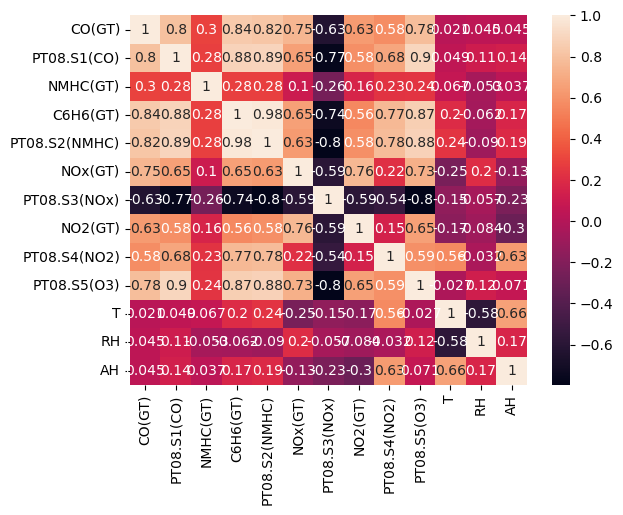

In [16]:
df_new=df.drop(['Date','Time'],axis=1)
correlation_matrix = df_new.corr()
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlation_matrix,annot=True)

In [17]:
# Deal with outliers using z-score
z_scores = ((df_new - df_new.mean()) / df_new.std()).abs()
outliers = (z_scores > 3).any(axis=1)
df_no_outliers = df_new[~outliers]
df_no_outliers.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8395 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         8395 non-null   float64
 1   PT08.S1(CO)    8395 non-null   float64
 2   NMHC(GT)       8395 non-null   float64
 3   C6H6(GT)       8395 non-null   float64
 4   PT08.S2(NMHC)  8395 non-null   float64
 5   NOx(GT)        8395 non-null   float64
 6   PT08.S3(NOx)   8395 non-null   float64
 7   NO2(GT)        8395 non-null   float64
 8   PT08.S4(NO2)   8395 non-null   float64
 9   PT08.S5(O3)    8395 non-null   float64
 10  T              8395 non-null   float64
 11  RH             8395 non-null   float64
 12  AH             8395 non-null   float64
dtypes: float64(13)
memory usage: 918.2 KB


In [18]:
# Split the dataset into training and test sets
X = df_no_outliers.drop('RH', axis=1)  
y = df_no_outliers['RH']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [29]:
# Standardize the features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [21]:
# Adding a column of ones for the intercept term
X_train_with_intercept = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_with_intercept = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

In [22]:
def linear_regression(X, y, learning_rate, num_iterations):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []

    for _ in range(num_iterations):
        predictions = np.dot(X, theta)
        errors = predictions - y
        theta -= (learning_rate / m) * np.dot(X.T, errors)
        cost = np.sum(errors**2) / (2 * m)
        cost_history.append(cost)

    return theta, cost_history

In [23]:
# Set hyperparameters
learning_rate = 0.01
num_iterations = 1000

theta, cost_history = linear_regression(X_train_with_intercept, y_train, learning_rate, num_iterations)

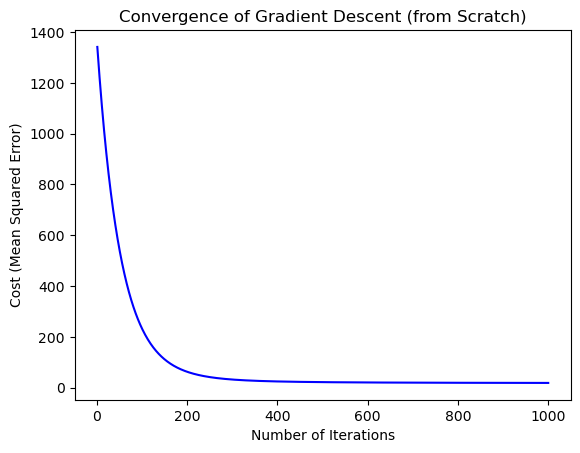

In [24]:
# Plot the cost history to check convergence
plt.plot(range(1, num_iterations + 1), cost_history, color='blue')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (Mean Squared Error)')
plt.title('Convergence of Gradient Descent (from Scratch)')
plt.show()

In [25]:
sklearn_model = LinearRegression()
sklearn_model.fit(X_train_scaled, y_train)

LinearRegression()

In [26]:
# Predictions using the model from scratch
predictions_scratch = np.dot(X_test_with_intercept, theta)

# Predictions using the scikit-learn model
predictions_sklearn = sklearn_model.predict(X_test_scaled)

In [27]:
# R^2 score and Mean Squared Error
r2_scratch = r2_score(y_test, predictions_scratch)
mse_scratch = mean_squared_error(y_test, predictions_scratch)

r2_sklearn = r2_score(y_test, predictions_sklearn)
mse_sklearn = mean_squared_error(y_test, predictions_sklearn)

In [28]:
# Comparing the results
print("Results from Scratch:")
print("R^2 Score:", r2_scratch)
print("Mean Squared Error:", mse_scratch)
print("\nResults from scikit-learn:")
print("R^2 Score:", r2_sklearn)
print("Mean Squared Error:", mse_sklearn)

Results from Scratch:
R^2 Score: 0.8848029009542804
Mean Squared Error: 36.36051625228808

Results from scikit-learn:
R^2 Score: 0.8879035439726555
Mean Squared Error: 35.38183725953471
